# Gaussian Location Model

Notebook for the convergence of the MMD$^2$ approximation

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

     |████████████████████████████████| 368kB 3.4MB/s 
     |████████████████████████████████| 430kB 3.2MB/s 


### Imports

In [ ]:
! pip install qmcpy --quiet

     |████████████████████████████████| 368kB 3.5MB/s 


In [ ]:
import numpy as np
import qmcpy

### Sampling

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,13) ]       # number of simulated samples - powers of 2
m = 2**13                               # number of true samples
num = 25                                # numbers of repetitions for MC and RQMC
theta = np.ones(1)                      # true theta
d = len(theta)                          # dimensions of data
s = 2                                   # standard deviation of the model
l = -1                                  # lengthscale (l=-1 for median heuristic)

Sample from the Gaussian location model:

In [ ]:
y = sample_gaussian('MC',m,d,s,theta)

### MMD$^2$ convergence

Define the QMC sequence:

In [ ]:
qmc = qmcpy.Halton(d)
qmc_1 = qmcpy.Halton(d+1) # for odd numbers of parameters

Calculate MMD$^2$ approximation for varying $n$:

In [ ]:
mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv('gaussian',n,num,d,y,l,theta,s)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096


Plot the MMD$^2$ approximation against $n$:

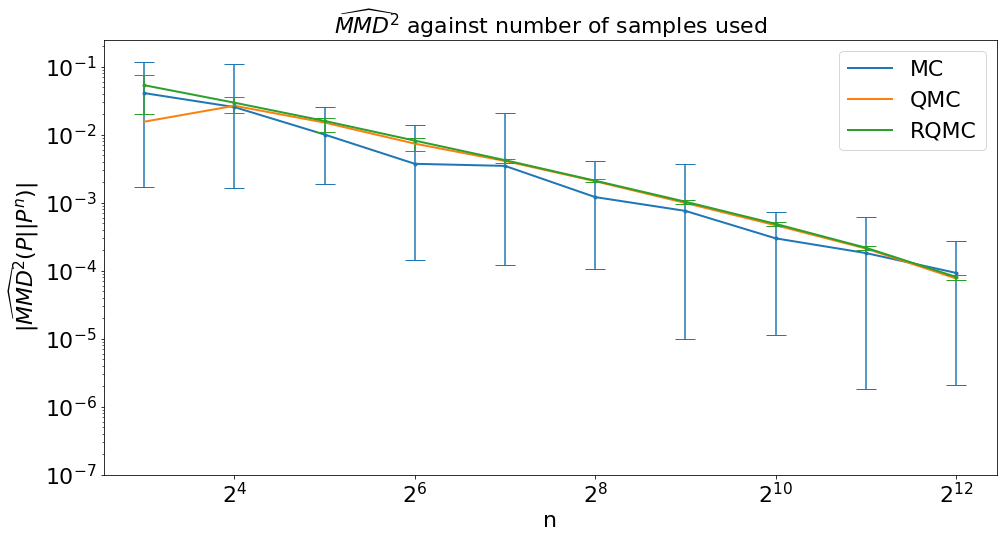

In [ ]:
plot_mmd_conv(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc, 'gaussian')